# Edelweiss Real Estate Housing Project

## 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('edw_launch_price_data.csv')
df.head()

,pid,b1,b2,b3,b4,b5,b6,b7,b8,zone,...,sp_interior,sp_switches,sp_windows,sp_wiring,sp_exterior,sp_frame,sp_points,sp_lobby,sp_cement,wap
0,1,106.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Zone A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14464.0000
1,2,NaN,98.0,52.0,NaN,NaN,NaN,NaN,NaN,Zone A,...,NaN,NaN,UPVC Windows with Granite Sills,NaN,NaN,NaN,NaN,NaN,NaN,13982.0000
2,3,NaN,98.0,52.0,NaN,NaN,NaN,NaN,NaN,Zone A,...,NaN,NaN,UPVC Windows with Granite Sills,NaN,NaN,NaN,NaN,NaN,NaN,13982.0000
3,6,107.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,Zone A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12857.0000
4,7,1.0,22.0,10.0,NaN,NaN,NaN,NaN,NaN,Zone A,...,NaN,NaN,French Windows,NaN,NaN,NaN,NaN,NaN,NaN,16981.5758


#### 1.1 Creation of micro_market number and developer_number columns

In [2]:
df['micro_market_number']=df['micro_market'].str.extract('(\d+)')
df['developer_number']=df['developer'].str.extract('(\d+)')
df['project_number']=df['project'].str.extract('(\d+)')

#### 1.2  Extract launch year from launch date

In [3]:
df['launch_year'] = pd.DatetimeIndex(df['launch_date']).year

#### 1.3 Log-transformation of wap into log_wap

In [4]:
df['log_wap'] = np.log(df['wap'])

#### 1.4 Recoding of proj_bedrooms

In [5]:
df['proj_bedrooms'].value_counts()

1,2              1075
1                 519
1,2,3             296
2,3               241
2                 161
3                  56
2,3,4              51
3,4                39
1,2,3,4            33
3,2                17
4                  16
3,1,2              14
1,3                12
3,4,5              10
1,2,4               9
1,2,3,5             8
1,3,4               6
2,3,5               6
2,4                 6
2,3,4,5             5
3,5                 4
4,5                 3
4,2,3               3
3,4,2               3
4,3                 3
1,2,3,4,5           3
1,3,4,5             2
4,1,3               1
2,3,5,1             1
2,3,4,5,1           1
3,4,6               1
3,6                 1
3,1                 1
1,5,8               1
2,3,4,1             1
4,2                 1
4,5,8               1
2,3,4,6             1
5,2,3,4             1
1,2,4,5             1
4,5,6,3             1
4,1,2,3             1
2,3,8               1
2,5                 1
6,7,1,2,3,4,5       1
6,1,2,3,4 

In [6]:
new_tags=['1,2,3','1,2,3,4','1,2,3,4','1,3','2,3','2,4','1,3,4','1,2,3,4,5','2,3,4,5','3,4','1,2,3,5','2,3,4','2,3,4']
old_tags=['3,1,2','4,1,2,3','2,3,4,1','3,1','3,2','4,2','4,1,3','2,3,4,5,1','5,2,3,4','4,3','2,3,5,1','4,2,3','3,4,2']

df["proj_bedrooms_clean"]=df["proj_bedrooms"]
df["proj_bedrooms_clean"]=df["proj_bedrooms_clean"].replace(old_tags,new_tags)
df["proj_bedrooms_clean"]=df["proj_bedrooms_clean"].str.split(',').str[0]
df["proj_bedrooms_clean"]=df["proj_bedrooms_clean"].replace(['1','2','3','4','5','6'],['1 and more','2 and more','3 and more','4 and more','5 and more','6 and more'])
df["proj_bedrooms_clean"].value_counts()

1 and more    1985
2 and more     498
3 and more     114
4 and more      21
6 and more       3
Name: proj_bedrooms_clean, dtype: int64

In [7]:
cols=['zone', 'micro_market_number', 'developer_number','project_number','wap','log_wap','proj_bedrooms_clean','unit_type','proj_launched_units','launch_year','max_size','min_size','b1','b2','b3','b4','b5','b6','b7','b8']
df1=pd.DataFrame(df[cols]).fillna("0")
df1.head()

,zone,micro_market_number,developer_number,project_number,wap,log_wap,proj_bedrooms_clean,unit_type,proj_launched_units,launch_year,max_size,min_size,b1,b2,b3,b4,b5,b6,b7,b8
0,Zone A,1,1,1,14464.0000,9.579418,1 and more,Apartment,111,2015,744.75,312.48,106,5,0,0,0,0,0,0
1,Zone A,1,2,2,13982.0000,9.545526,2 and more,Apartment,150,2014,1003.30,730.87,0,98,52,0,0,0,0,0
2,Zone A,1,2,3,13982.0000,9.545526,2 and more,Apartment,150,2014,1003.30,730.87,0,98,52,0,0,0,0,0
3,Zone A,1,5,6,12857.0000,9.461644,1 and more,Apartment,120,2016,590.51,269.96,107,13,0,0,0,0,0,0
4,Zone A,1,7,8,16981.5758,9.739884,1 and more,Apartment,33,2015,1717.00,681.57,1,22,10,0,0,0,0,0


#### 1.5 Label Encoding and Type Conversion

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 20 columns):
zone                   2621 non-null object
micro_market_number    2621 non-null object
developer_number       2621 non-null object
project_number         2621 non-null object
wap                    2621 non-null float64
log_wap                2621 non-null float64
proj_bedrooms_clean    2621 non-null object
unit_type              2621 non-null object
proj_launched_units    2621 non-null int64
launch_year            2621 non-null int64
max_size               2621 non-null float64
min_size               2621 non-null float64
b1                     2621 non-null object
b2                     2621 non-null object
b3                     2621 non-null object
b4                     2621 non-null object
b5                     2621 non-null object
b6                     2621 non-null object
b7                     2621 non-null object
b8                     2621 non-null object
dtypes: flo

In [9]:
def type_converter (dataframe, col_name, data_type):
    dataframe[col_name]=dataframe[col_name].astype(data_type)

In [10]:
for i in list(df1.columns)[-8:]:
    type_converter (df1, i, 'int')

In [11]:
for i in ['zone','micro_market_number','proj_bedrooms_clean','project_number','unit_type','launch_year']:
    type_converter (df1, i, 'category')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 20 columns):
zone                   2621 non-null category
micro_market_number    2621 non-null category
developer_number       2621 non-null object
project_number         2621 non-null category
wap                    2621 non-null float64
log_wap                2621 non-null float64
proj_bedrooms_clean    2621 non-null category
unit_type              2621 non-null category
proj_launched_units    2621 non-null int64
launch_year            2621 non-null category
max_size               2621 non-null float64
min_size               2621 non-null float64
b1                     2621 non-null int32
b2                     2621 non-null int32
b3                     2621 non-null int32
b4                     2621 non-null int32
b5                     2621 non-null int32
b6                     2621 non-null int32
b7                     2621 non-null int32
b8                     2621 non-null int32
dtypes

#### Creation of b48 column

In [13]:
df1['b48']=df1['b4']+df1['b5']+df1['b6']+df1['b7']+df1['b8']

## 2. Exploratory Data Analysis

### 2.1 Cluster Analysis of Micromarkets

1. K-Means Clustering based on mean of wap for every micromarket
2. Assigning cluster numbers to respective micro_markets
3. Counting number of projects and micromarkets in every cluster

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")
sns.set_color_codes("dark")

In [15]:
mm=df1.groupby('micro_market_number')['wap'].mean()
mm

micro_market_number
1      16070.897978
10     12709.734924
100     6730.000000
101     4800.454082
102     7601.348358
104     4550.000000
105     9666.666667
106     5561.967821
107     8028.775714
108    10951.648586
109     4281.954455
11     13484.938329
110     5600.885779
111    15000.000000
112     3487.000000
113     4788.333333
114    10016.946792
115    24283.307556
116    49078.461538
118    36898.200000
119    34324.333333
12     12687.445504
120    33074.574463
121    19744.017888
122    38020.914456
123    28022.157103
124    31466.083000
13     14725.692669
14      3217.645000
15      3230.666667
           ...     
69      3134.751107
7      14843.527256
70      2900.637781
72      4615.802286
73      4877.616544
75     17564.462999
76     17072.694050
77     18741.930000
79     17901.507612
8      16130.349347
80     20000.000000
81     50000.000000
82     24814.456483
84     31521.000000
85     31160.750000
86     24508.750000
87     26954.200000
88     29835.340446


In [16]:
mm.shape

(113L,)

In [17]:
mm=mm.as_matrix(columns=None)
mm=mm.reshape(-1, 1)
mm.shape

C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(113L, 1L)

In [18]:
from sklearn.cluster import KMeans

#clustering formula
kmeans = KMeans(n_clusters=22, n_init=100, max_iter=1000,n_jobs=5)

# get the clusters
kmm = kmeans.fit_predict(mm)

#clustering metric
from sklearn.metrics import silhouette_score
print(silhouette_score(mm, kmm))

0.6491078478306269


In [19]:
#cluster dataframe
kmm=pd.DataFrame(kmm)
kmm.columns=['cluster']

#cluster number and number of projects for every micromarket
mm_proj=df1.groupby('micro_market_number')['project_number'].count().reset_index()
mm_proj=pd.concat([mm_proj, kmm],axis=1)
mm_proj

,micro_market_number,project_number,cluster
0,1,49,2
1,10,12,14
2,100,5,12
3,101,49,0
4,102,33,12
5,104,2,0
6,105,3,19
7,106,55,18
8,107,7,12
9,108,14,5


In [20]:
# Dictionary mapping micromarket number with cluster numbers
market_cluster = dict(zip(mm_proj['micro_market_number'], mm_proj['cluster']))
market_cluster

{'1': 2,
 '10': 14,
 '100': 12,
 '101': 0,
 '102': 12,
 '104': 0,
 '105': 19,
 '106': 18,
 '107': 12,
 '108': 5,
 '109': 20,
 '11': 14,
 '110': 18,
 '111': 9,
 '112': 15,
 '113': 0,
 '114': 5,
 '115': 13,
 '116': 7,
 '118': 11,
 '119': 4,
 '12': 14,
 '120': 4,
 '121': 6,
 '122': 11,
 '123': 1,
 '124': 10,
 '13': 9,
 '14': 15,
 '15': 15,
 '16': 20,
 '17': 15,
 '18': 0,
 '19': 20,
 '2': 6,
 '20': 15,
 '21': 8,
 '22': 15,
 '23': 15,
 '24': 20,
 '25': 20,
 '26': 8,
 '27': 15,
 '28': 15,
 '29': 20,
 '3': 9,
 '30': 0,
 '31': 18,
 '32': 0,
 '33': 18,
 '34': 8,
 '36': 8,
 '38': 8,
 '4': 2,
 '40': 8,
 '41': 15,
 '42': 0,
 '43': 15,
 '44': 19,
 '45': 8,
 '46': 8,
 '47': 8,
 '48': 1,
 '49': 19,
 '5': 14,
 '50': 5,
 '51': 2,
 '52': 2,
 '53': 14,
 '54': 14,
 '55': 11,
 '56': 9,
 '57': 9,
 '59': 16,
 '6': 9,
 '60': 17,
 '61': 9,
 '62': 12,
 '63': 12,
 '64': 8,
 '66': 12,
 '67': 20,
 '68': 20,
 '69': 15,
 '7': 9,
 '70': 8,
 '72': 0,
 '73': 0,
 '75': 16,
 '76': 2,
 '77': 16,
 '79': 16,
 '8': 2,
 '80':

In [21]:
# Create a new column in the dataset indicating cluster numbers, initialised with micromarket numbers
df1['cluster']=df1['micro_market_number']
# Map cluster numbers to their respective micromarket numbers 
df1['cluster']=df1['cluster'].map(market_cluster)
df1['cluster'].value_counts()

15    369
18    347
5     230
9     218
20    202
0     192
8     190
2     187
14    129
12    126
16    124
6      73
1      46
11     42
13     32
10     30
4      23
19     19
7      14
17     14
3       7
21      7
Name: cluster, dtype: int64

In [22]:
# How many projects are there for each cluster?
kmm_proj=df1.groupby('cluster')['project_number'].count().reset_index()
kmm_proj=pd.DataFrame(kmm_proj)
kmm_proj

,cluster,project_number
0,0,192
1,1,46
2,2,187
3,3,7
4,4,23
5,5,230
6,6,73
7,7,14
8,8,190
9,9,218


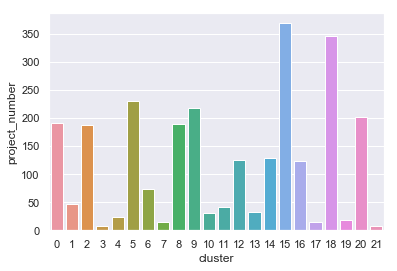

In [23]:
# projects per cluster
sns.barplot(x="cluster", y="project_number", data=kmm_proj)

In [24]:
kmm_micro=mm_proj.groupby('cluster')['micro_market_number'].count().reset_index()
kmm_micro=pd.DataFrame(kmm_micro)
kmm_micro

,cluster,micro_market_number
0,0,9
1,1,5
2,2,6
3,3,2
4,4,2
5,5,4
6,6,3
7,7,2
8,8,11
9,9,9


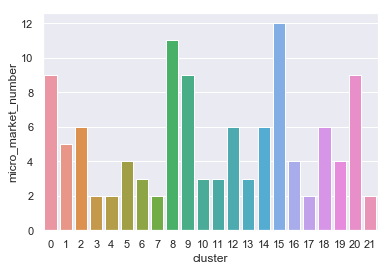

In [25]:
#Number of micromarkets in each cluster
sns.barplot(x="cluster", y="micro_market_number", data=kmm_micro)

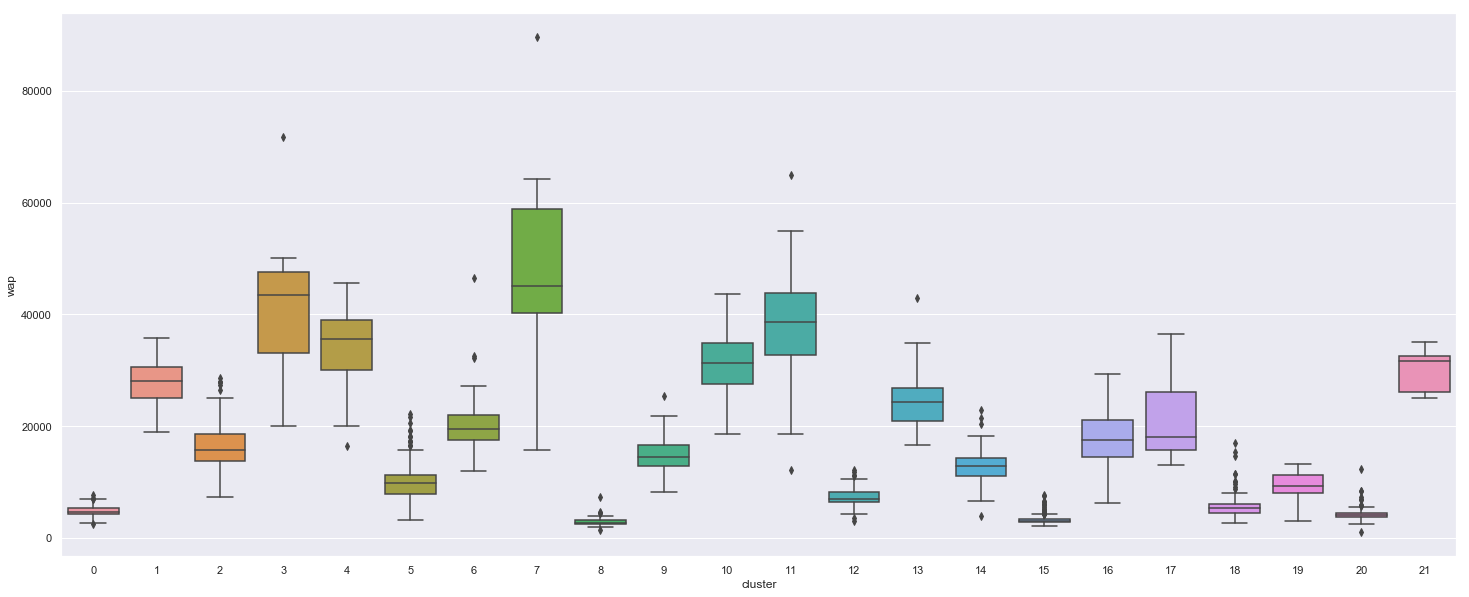

In [26]:
# wap against different clusters
f, ax = plt.subplots(figsize=(25,10))
sns.boxplot(x="cluster", y="wap", data=df1)

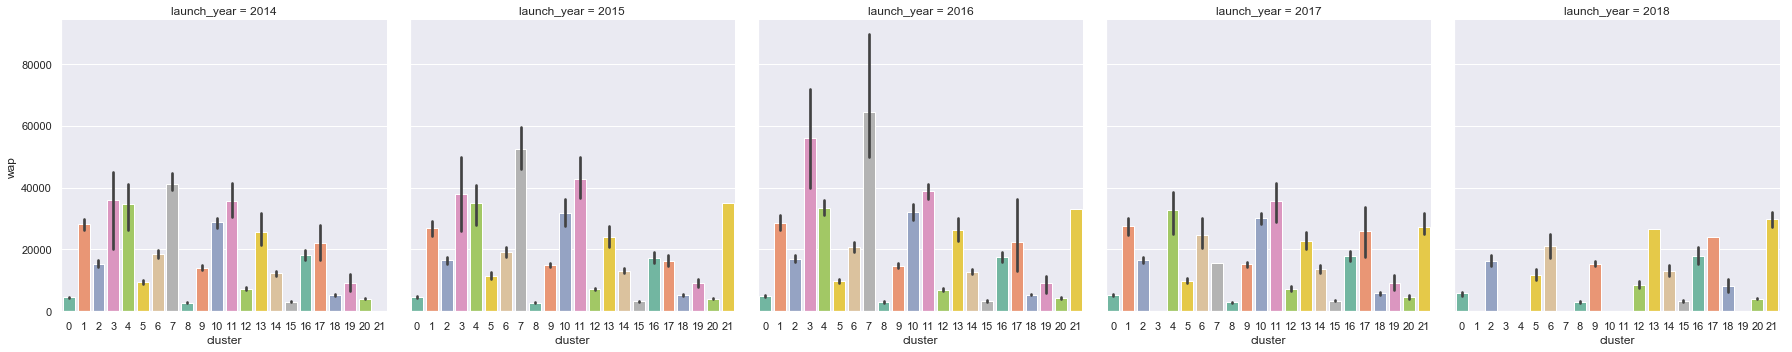

In [27]:
g = sns.catplot(x="cluster", y="wap", col="launch_year", data=df1, kind="bar", height=5, aspect=1, palette='Set2')

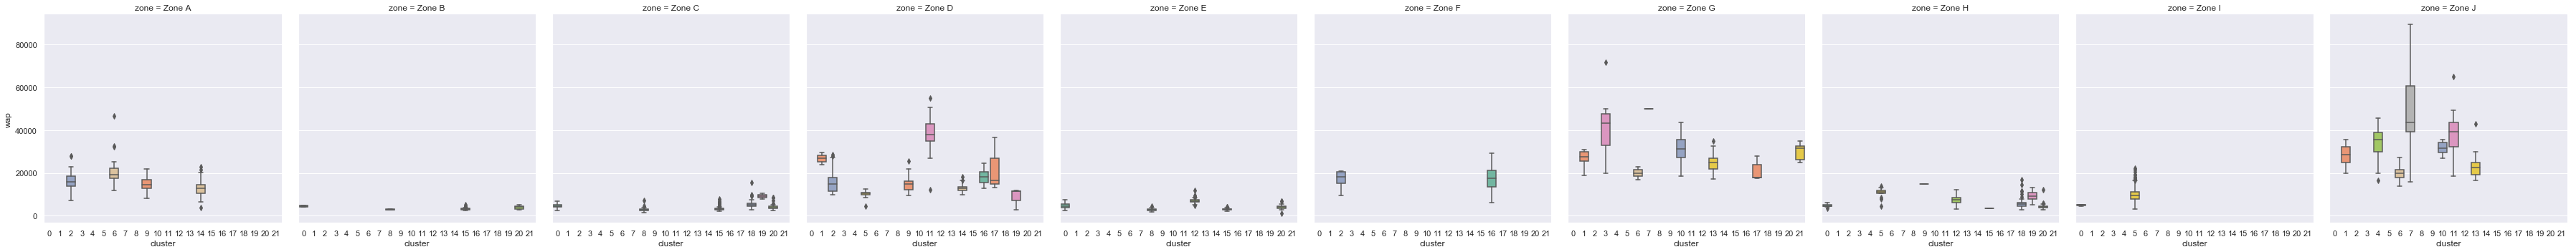

In [28]:
g = sns.catplot(x="cluster", y="wap", col="zone", data=df1, kind="box", height=5, aspect=1, palette='Set2')

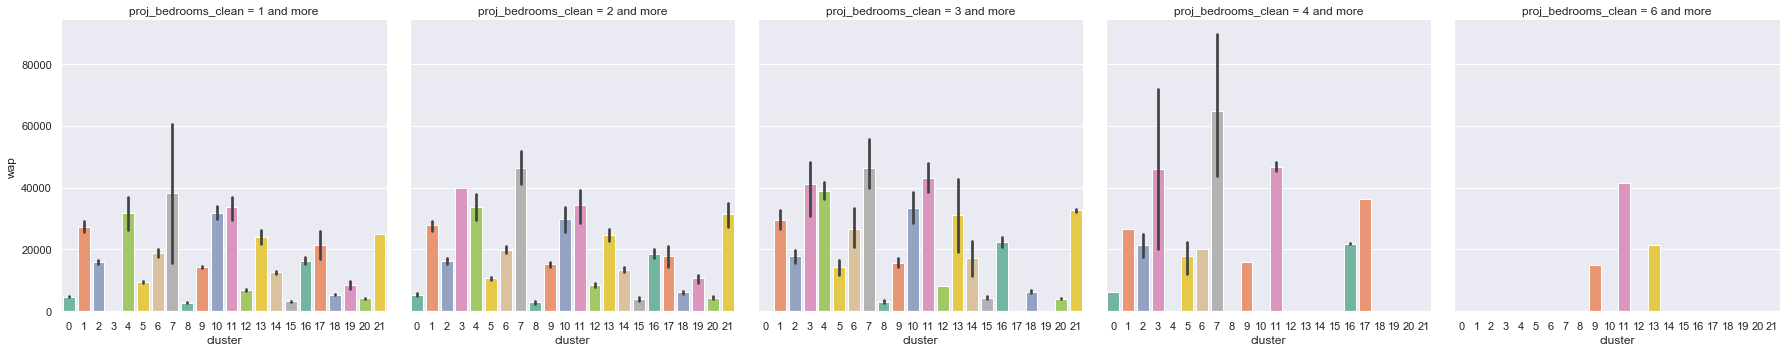

In [29]:
g = sns.catplot(x="cluster", y="wap", col="proj_bedrooms_clean", data=df1, kind="bar", height=5, aspect=1, palette='Set2')

## 2.2 Wap against different possible predictor variables

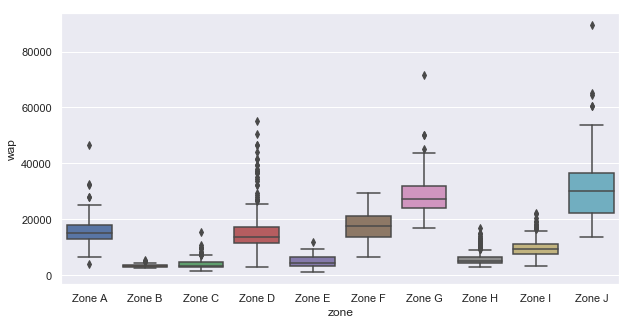

In [30]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="zone", y="wap",data=df1)

In [ ]:
g = sns.catplot(x="launch_year", y="wap", col="zone", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

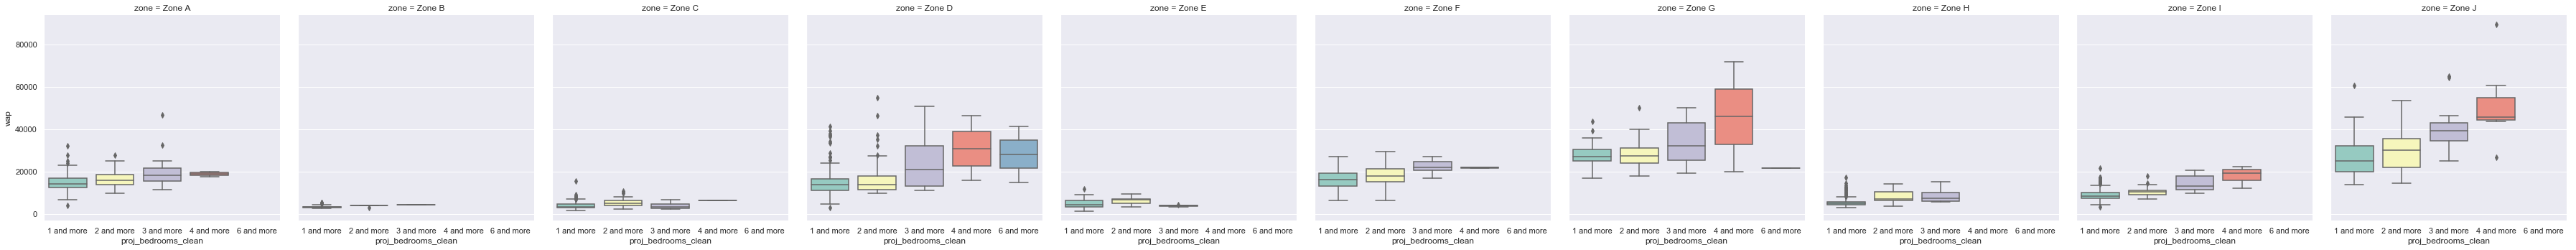

In [71]:
g = sns.catplot(x="proj_bedrooms_clean", y="wap", col="zone", data=df1, kind="box", height=5, aspect=1, palette='Set3')

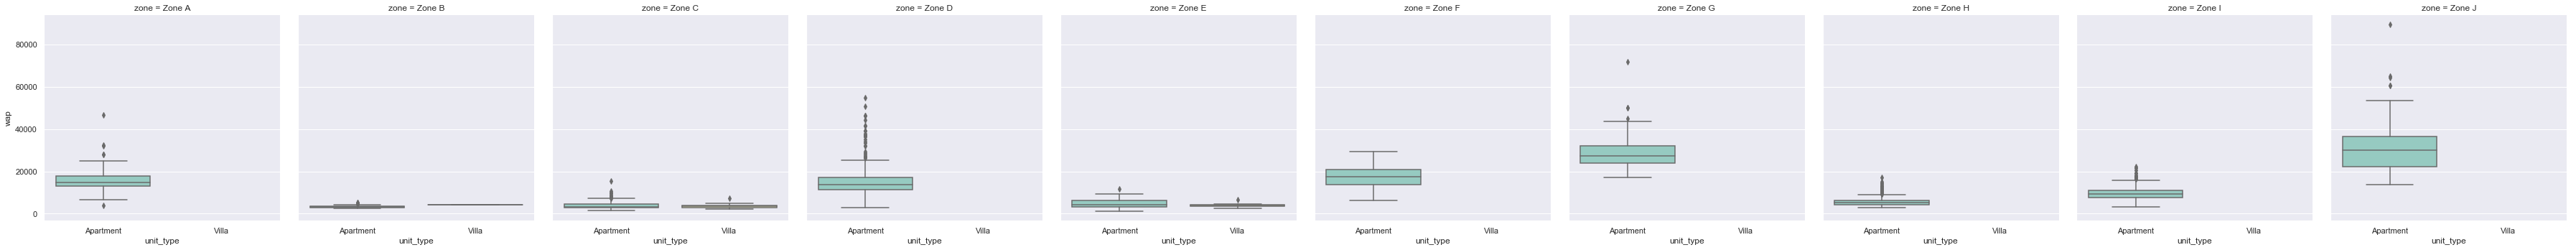

In [72]:
g = sns.catplot(x="unit_type", y="wap", col="zone", data=df1, kind="box", height=5, aspect=1, palette='Set3')

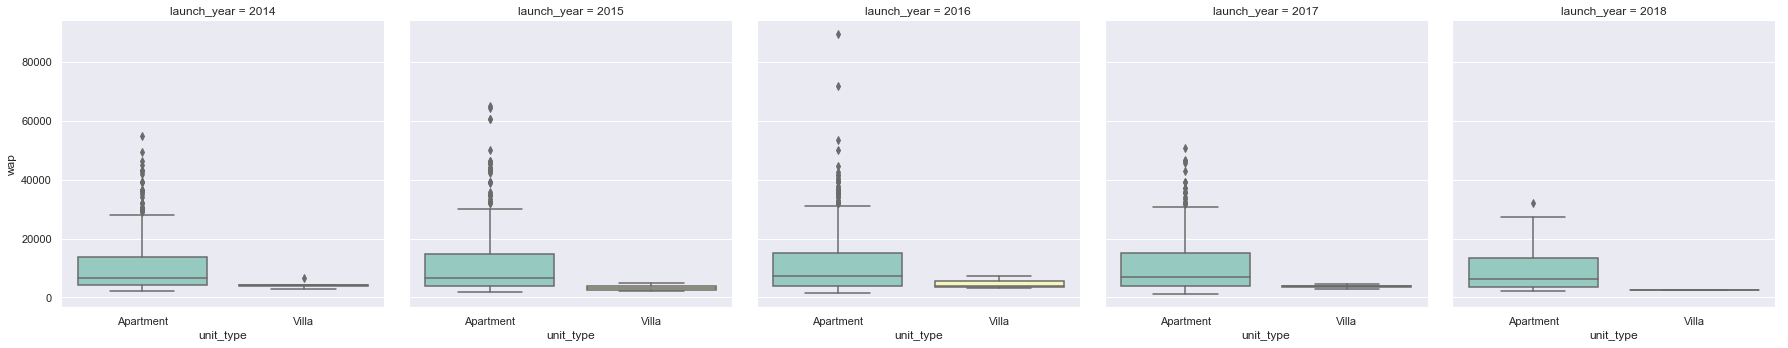

In [73]:
g = sns.catplot(x="unit_type", y="wap", col="launch_year", data=df1, kind="box", height=5, aspect=1, palette='Set3')

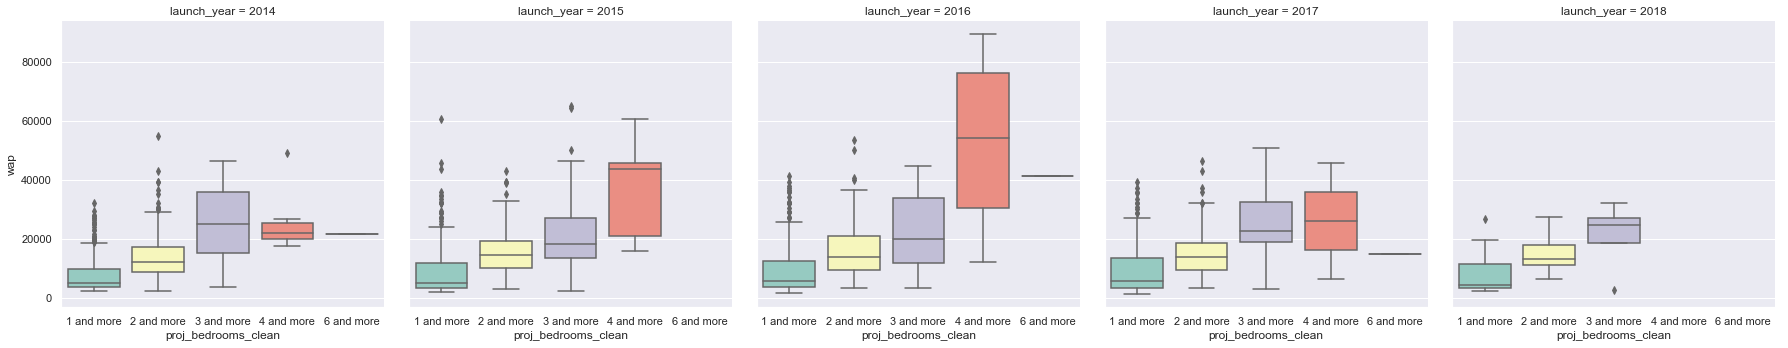

In [74]:
g = sns.catplot(x="proj_bedrooms_clean", y="wap", col="launch_year", data=df1, kind="box", height=5, aspect=1, palette='Set3')

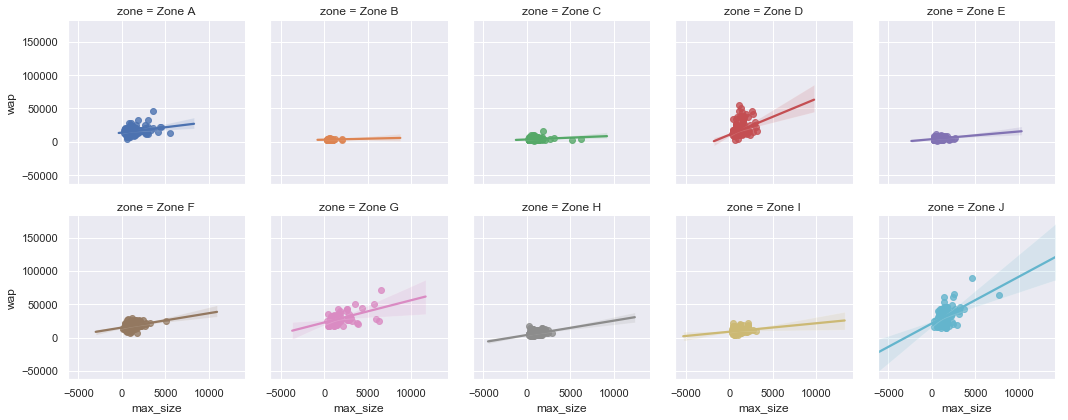

In [75]:
sns.lmplot(x="max_size", y="wap",col='zone',hue='zone',col_wrap=5, height=3,data=df1)

## 3. Base Model of log-transformed wap

In [76]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
    
module = smf.ols(formula='wap ~ max_size + C(cluster) + b1 + b2 + b3 + C(launch_year) + C(unit_type)+ C(proj_bedrooms_clean)', data=df1)
est = module.fit()
print(est.summary())

ValueError: bad marshal data (string size out of range)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

mod = smf.ols(formula='log_wap ~ max_size + C(cluster) + b1 + b2 + b3 + C(launch_year) + C(unit_type) + C(proj_bedrooms_clean)', data=df1)
res = mod.fit()
print(res.summary())

In [ ]:
pred_lwap = res.predict()
df1['residual_log']=df1['log_wap'] - pred_lwap
df1['residual_log'].describe()

In [ ]:
pred_wap=np.exp(pred_lwap)
df1['residual']=df1['wap'] - pred_wap
df1['residual'].head(10)

In [ ]:
pred_wap=pd.DataFrame(pred_wap)
pred_wap.columns=['pred_wap']

df1=pd.concat([df1,pred_wap],axis=1)
df1.head()

In [ ]:
f, ax = plt.subplots(1,2,figsize=(5,5))
sns.distplot(df1['residual'],color="y", ax=ax[0])
sns.distplot(df1['residual_log'],color="y",ax=ax[1])

In [ ]:
print("Skewness of residual: %f" % df1['residual'].skew())
print("Kurtosis of residual: %f" % df1['residual'].kurt())
print("Skewness of residual_log: %f" % df1['residual_log'].skew())
print("Kurtosis of residual_log: %f" % df1['residual_log'].kurt())

In [ ]:
f, ax = plt.subplots(2,2,figsize=(25,10))
sns.residplot(x="max_size", y='pred_wap',data=df1,color="r",ax=ax[0,0])
sns.residplot(x="b1", y='pred_wap',data=df1,color="black",ax=ax[0,1])
sns.residplot(x="b2", y='pred_wap',data=df1,color="y",ax=ax[1,0])
sns.residplot(x="b3", y='pred_wap',data=df1, color="green",ax=ax[1,1])

In [ ]:
import scipy.stats as stats

fig = sm.qqplot(df1['residual_log'], stats.t, fit=True, line='45')
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
fig=sm.graphics.influence_plot(res, ax=ax, color='b')

## 4. Cluster Analysis of amenities

In [ ]:
amenities=df.loc[:,'am_water':'am_water_supply']
amenities.count().sort_values(ascending=False)

In [ ]:
amenities=amenities.fillna("No")
amenities.head()

In [ ]:
def label_encoder(dataframe, col_name):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(dataframe[col_name].unique())
    dataframe[col_name] = le.transform(dataframe[col_name])

In [ ]:
for i in list(amenities.columns):  
    label_encoder(amenities, i)

In [ ]:
amenities['am_water']=amenities['am_water']+amenities['am_water_cons']+amenities['am_water_supply']+amenities['am_rain_harvest']
amenities['am_security']=amenities['am_security']+amenities['am_security_guards']+amenities['am_intercom']+amenities['am_cctv']
amenities['am_outdoor_game']=amenities['am_badmintorn']+amenities['am_basketball']+amenities['am_cric_pitch']+amenities['am_golf']+amenities['am_sports']+amenities['am_tennis']+amenities['am_swim']+amenities['am_jog']
amenities['am_indoor_game']=amenities['am_aerobics']+amenities['am_gym']+amenities['am_skating']+amenities['am_indoor_games']+amenities['am_squash']+amenities['am_spa']
amenities['am_sewage']=amenities['am_swer_trt_plt']+amenities['am_swr_chamber']+amenities['am_sold_waste']+amenities['am_storm_drain']+amenities['am_swr_trt_slug']
amenities['am_roads']=amenities['am_roads']+amenities['am_road_footpath']+amenities['am_streetlight']
amenities['am_cyber']=amenities['am_internet']
amenities['am_power']=amenities['am_energy_mgmt']+amenities['am_elec_meter_room']+amenities['am_ht_alarm']+amenities['am_transformer']+amenities['am_earthquake']+amenities['am_power_backup']
amenities['am_religion']=amenities['am_temple']+amenities['am_vaastu']
amenities['am_space']=amenities['am_ls_garden']+amenities['am_ls_tree']+amenities['am_child_play']+amenities['am_open_space']+amenities['am_amphi']+amenities['am_rec_facility']
amenities['am_finance']=amenities['am_atm']+amenities['am_business_center']
amenities['am_firefighting']=amenities['am_ff_system']+amenities['am_ff_req']
amenities['am_health_related']=amenities['am_health']+amenities['am_hosp']
amenities['am_car_parking']=amenities['am_open_carpark']+amenities['am_open_parking']+amenities['am_closed_carpark']+amenities['am_carpark']
amenities['am_education']=amenities['am_lib']+amenities['am_oth']+amenities['am_school']
amenities['am_maintenance']=amenities['am_maint_staff']+amenities['am_gated']+amenities['am_staffq']
amenities['am_social_gatherings']=amenities['am_commu_building']+amenities['am_commu_hall']+amenities['am_banquet']+amenities['am_party_hall']+amenities['am_club']+amenities['am_multi_room']+amenities['am_cafeteria']
amenities['am_lift']=amenities['am_lift']+amenities['am_service_lift']
amenities['am_shop']=amenities['am_shopmall']+amenities['am_utility_shop']

In [ ]:
for i in ['am_water','am_security','am_outdoor_game','am_indoor_game','am_sewage','am_roads','am_cyber','am_power','am_religion','am_space','am_finance','am_firefighting','am_health_related','am_car_parking','am_education','am_maintenance','am_social_gatherings','am_lift','am_shop']:
    amenities[i]=amenities[i].replace([2,3,4,5,6,7],[1,1,1,1,1,1])
    

In [ ]:
for i in list(amenities.columns):
    type_converter (amenities, i, 'category')

In [ ]:
df1=pd.concat([df1,amenities],axis=1)
df1.head()

## 5. Analysis of and Plugging in Specifications to Regression Model

In [ ]:
specifications=df.loc[:,'sp_balcony':'sp_cement']
specifications.count().sort_values(ascending=False)

In [ ]:
specifications=specifications.fillna('No')
specifications.head()

In [ ]:
specifications.info()

In [ ]:
for i in list(specifications.columns):
    specifications[i]=specifications[i].str.contains('No')

In [ ]:
for i in list(specifications.columns):
    label_encoder(specifications, i)
    specifications[i] = specifications[i].replace([0,1],[1,0])

In [ ]:
for i in list(specifications.columns):
    type_converter (specifications, i, 'category')

In [ ]:
df1=pd.concat([df1,specifications],axis=1)
df1.head()

In [ ]:
import statsmodels.formula.api as smf

mod1 = smf.ols(formula='log_wap ~ max_size + C(cluster) + b1 + b2 + b3 + C(launch_year)+ C(proj_bedrooms_clean) + C(unit_type)+ C(am_water)+ C(am_security)+ C(am_indoor_game) + C(am_outdoor_game)+ C(am_sewage)+C(am_roads)+C(am_cyber)+ C(am_power)+ C(am_religion)+C(am_space)+C(am_finance)+C(am_firefighting)+C(am_health_related)+C(am_car_parking)+C(am_education)+C(am_maintenance)+C(am_social_gatherings)+C(am_lift)+C(am_shop)+ C(sp_balcony)+C(sp_kitchen)+C(sp_livdin)+C(sp_mas_bed)+C(sp_oth_bed)+C(sp_toilets)+C(sp_internal)+C(sp_main)+C(sp_interior)+C(sp_switches)+C(sp_windows)+C(sp_wiring)+C(sp_exterior)+C(sp_frame)+C(sp_points)+C(sp_lobby)+C(sp_cement)', data=df1).fit()
print(mod1.summary())

## 6.Chi-Square Test Between Base Model Residual & Amenities & Specifications

In [ ]:
df1['wap_level']=0
df1['residual_abs_level']=df1['residual_abs']=np.absolute(df1['residual'])

df1.loc[df1['wap'] > 20000, 'wap_level']= "High"
df1.loc[(df1['wap'] >= 4000) & (df1['wap'] <= 20000),'wap_level']= "Medium"
df1.loc[df1['wap'] < 4000, 'wap_level']= "Low"

df1.loc[df1['residual_abs'] > 2500, 'residual_abs_level']= "High"
df1.loc[(df1['residual_abs'] >= 300) & (df1['residual_abs'] <= 2500),'residual_abs_level']= "Medium"
df1.loc[(df1['residual_abs'] < 300), 'residual_abs_level']= "Low"

In [ ]:
df1['residual_abs_level'].value_counts()

In [ ]:
df1['wap_level'].value_counts()

In [ ]:
from scipy.stats import chi2_contingency

print("-----P-Values of amenities clusters vs residual of base model-----")
for i in ['am_water','am_security','am_outdoor_game','am_indoor_game','am_sewage','am_roads','am_cyber','am_power','am_religion','am_space','am_finance','am_firefighting','am_health_related','am_car_parking','am_education','am_maintenance','am_social_gatherings','am_lift','am_shop']:
    cont=pd.crosstab(df1['residual_abs_level'],df1[i])
    g, p, dof, expctd = chi2_contingency(cont)
    print(i,": ", p)

Chose top 6 clusters with lowest p-values: am_cyber, am_education, am_finance, am_health_related, am_indoor_game, am_security

In [ ]:
print("-----P-Values of specifications vs residual of base model-----")
for i in list(specifications.columns):
    cont=pd.crosstab(df1['residual_abs_level'],df1[i])
    g, p, dof, expctd = chi2_contingency(cont)
    print(i,": ", p)

At 1% significance level, the following specifications are dependent on base model residuals:

sp_interior, sp_main, sp_exterior, sp_points, sp_cement

### 6.1 Boxplots of Base Model Residuals & Wap Levels Against Amenities

In [ ]:
g = sns.catplot(x="am_cyber", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="am_cyber", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

In [ ]:
g = sns.catplot(x="am_education", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="am_education", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

In [ ]:
g = sns.catplot(x="am_finance", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="am_finance", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

In [ ]:
g = sns.catplot(x="am_health_related", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="am_health_related", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

In [ ]:
g = sns.catplot(x="am_security", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="am_security", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

In [ ]:
g = sns.catplot(x="am_indoor_game", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="am_indoor_game", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

### 6.2 Boxplots of Base Model Residuals & Wap Levels Against Specifications

In [ ]:
g = sns.catplot(x="sp_interior", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="sp_interior", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

In [ ]:
g = sns.catplot(x="sp_main", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="sp_main", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

In [ ]:
g = sns.catplot(x="sp_exterior", y="wap",col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="sp_exterior", y="residual",col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

In [ ]:
g = sns.catplot(x="sp_points", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="sp_points", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

In [ ]:
g = sns.catplot(x="sp_cement", y="wap", col="wap_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')
g = sns.catplot(x="sp_cement", y="residual", col="residual_abs_level", data=df1, kind="box", height=5, aspect=.7,palette='Set3')

## 7. Seperate Models for High & Low Cutoff Prices

In [ ]:
high_cutoff = df1.loc[df1['wap'] <= 10000, :]
low_cutoff = df1.loc[df1['wap'] > 10000, :]

In [ ]:
hc = smf.ols(formula='log_wap ~ max_size + C(cluster) + b1 + b2 + b3 + C(launch_year)+ C(unit_type) + + C(am_security) + C(am_indoor_game) + C(am_cyber) + C(am_finance)+ C(am_health_related) + C(am_education) + C(sp_interior) + C(sp_main) + C(sp_exterior) + C(sp_points) + C(sp_cement)', data=high_cutoff).fit()
print(hc.summary())


In [ ]:
lc = smf.ols(formula='log_wap ~ max_size + C(cluster) + b1 + b2 + b3 + C(launch_year)+ C(unit_type) + C(am_security) + C(am_indoor_game) + C(am_cyber) + C(am_finance)+ C(am_health_related) + C(am_education) + C(sp_interior) + C(sp_main) + C(sp_exterior) + C(sp_points) + C(sp_cement)', data=low_cutoff).fit()
print(lc.summary())

## 8. Random Forest Regressor 

In [ ]:
include=['log_wap','max_size','cluster', 'b1','b2','b3', 'unit_type','proj_bedrooms_clean','launch_year', 'am_security', 'am_indoor_game', 'am_cyber', 'am_finance', 'am_health_related','am_education', 'sp_interior', 'sp_main', 'sp_exterior', 'sp_points','sp_cement']
df2=pd.DataFrame(df1[include])

label_encoder(df2,'unit_type')
label_encoder(df2,'proj_bedrooms_clean')
type_converter (df2, 'unit_type', 'category')
type_converter (df2, 'proj_bedrooms_clean', 'category')

df2.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

target = 'log_wap'
features = df2.columns != target

x = df2.loc[:, features]
y = df2[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
rf = RandomForestRegressor(n_estimators=3000, n_jobs=5)
rf.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred=rf.predict(x_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred)) 

In [ ]:
importances = pd.Series(data=rf.feature_importances_,
index= x_train.columns)

# Sort importances
importances_sorted = importances.sort_values()
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Random Forest Features Importances')
plt.show()